In [4]:
import numpy as np
import matplotlib.pyplot as plt
# from skimage import color
# from skimage import io
from PIL import Image

(549, 976)


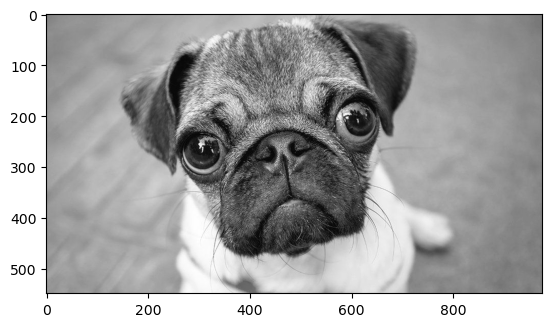

In [11]:
# image = color.rgb2gray(io.imread("images/dog.jpg"))
image = Image.open("images/dog.jpg").convert('L')
image = np.asarray(image, dtype='float64')
print(image.shape)
plt.imshow(image, cmap='gray')

In [12]:
def truncated_SVD(A, rank=50):
    U, sigmas, V = np.linalg.svd(A)
    V = V.T
    S = np.zeros(A.shape)
    for it in range(min(A.shape)):
        S[it, it] = sigmas[it]
    A_k = U[:, :rank].dot(S[:rank, :rank])
    A_k = A_k.dot(V[:, :rank].T)
    return A_k, sigmas

[[134.78580904 134.83643553 134.80408808 ... 120.80076198 120.47256099
  120.11249971]
 [134.66443537 134.71079444 134.65045755 ... 121.0044639  120.67449975
  120.3014156 ]
 [134.50887704 134.5573476  134.49322382 ... 121.12199222 120.80002651
  120.41705442]
 ...
 [145.57261128 145.47682515 145.38193002 ... 125.4449254  125.12851122
  124.74868071]
 [144.02954302 144.06125661 144.04937004 ... 124.29393914 123.99779423
  123.58532123]
 [142.62662227 142.76842258 142.86209091 ... 123.23393658 122.94559778
  122.51475411]]


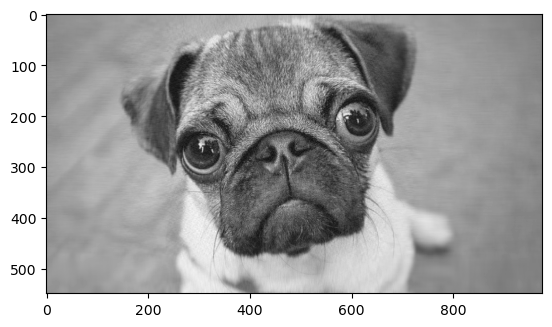

In [13]:
rank = 100
pressed_image, sigmas = truncated_SVD(image, rank)
print(pressed_image)
plt.imshow(pressed_image, cmap='gray')

In [14]:
loss = 1 - (np.sum(sigmas[:rank] ** 2) / np.sum(sigmas ** 2))
print(loss)

0.0024058018131974945
